In [ ]:
import pickle as pk
from tqdm import tqdm
with open('graph_data.pkl', 'rb') as f:
    for _ in tqdm(range(2465)):
        graph = pk.load(f)
        print(graph)

In [11]:
import torch
latent_reps = torch.load('latent_space.pt')

In [12]:
scatter_coeffs = torch.load('scatter_coeffs_under_200.pt')

In [13]:
latent_reps.shape

torch.Size([5000, 200, 11, 64])

In [14]:
average_latent_reps = torch.mean(latent_reps, dim=(1,2)).detach().numpy()


In [20]:
average_latent_reps.shape

(5000, 64)

In [18]:
num_nodes_lst = [coefficient_matrix.shape[0] for coefficient_matrix in scatter_coeffs[:5000]]


In [ ]:
num_nodes_lst

In [17]:
len(scatter_coeffs)

23581

Calculating PHATE...
  Running PHATE on 5000 observations and 64 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.47 seconds.
    Calculating affinities...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/graphtools/graphs.py:290: RuntimeWarning: Detected zero distance between 46004 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 3.42 seconds.
  Calculated graph and diffusion operator in 3.89 seconds.
  Calculating landmark operator...
    Calculating SVD...


/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/graphtools/graphs.py:454: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/gpfs/gibbs/project/krishnaswamy_smita/sv496/conda_envs/mfcn/lib/python3.9/site-packages/graphtools/base.py:554: RuntimeWarning: K should have a non-zero diagonal
  warnings.warn("K should have a non-zero diagonal", RuntimeWarning)


    Calculated SVD in 0.18 seconds.
    Calculating KMeans...


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

    Calculated KMeans in 5.09 seconds.


OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detect OpenMP Loop and this application may hang. Please rebuild the library with USE_OPENMP=1 option.
OpenBLAS Warning : Detec

  Calculated landmark operator in 5.49 seconds.
  Calculating optimal t...
    Automatically selected t = 29
  Calculated optimal t in 0.09 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.28 seconds.
Calculated PHATE in 9.79 seconds.


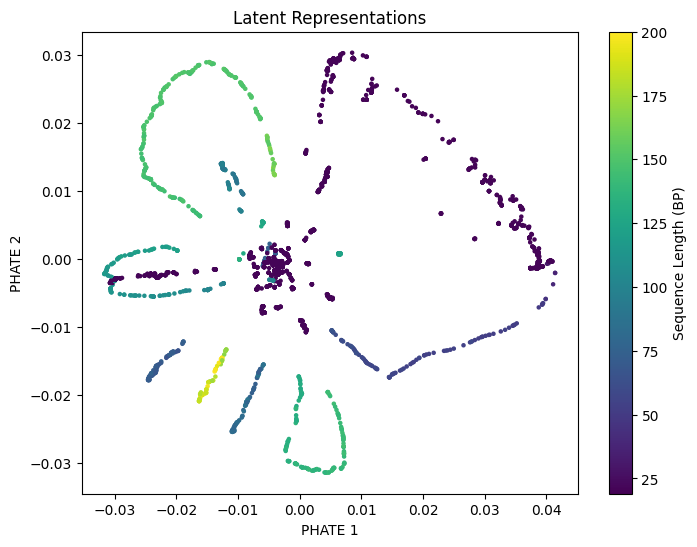

In [23]:
import phate
import matplotlib.pyplot as plt
# Create PHATE object
phate_operator = phate.PHATE()

# Fit and transform the latent representation
z_phate = phate_operator.fit_transform(average_latent_reps)

# Visualize the latent representation
plt.figure(figsize=(8, 6))
plt.scatter(z_phate[:, 0], z_phate[:, 1], s=5, c = num_nodes_lst, cmap='viridis')
cb = plt.colorbar()
cb.set_label('Sequence Length (BP)')
plt.xlabel('PHATE 1')
plt.ylabel('PHATE 2')
plt.title('Latent Representations')
plt.show()
